# Loan Repayment Prediction Model

# Problem Statement

You really impressed the management of European Bank with the last deliverable, and they have now requested you to assist further with analyzing their loans data. We have dealt with European Bank before, but as a recap, they connects people who need money (borrowers) with people who have money (investors). Now bank would want to invest in people who showed a profile of having a high probability of paying back. 
For this project we will be using publicly available data from LendingClub(2007-2010) and predict whether or not the 
borrower paid back their loan in full. Bank is looking for a model that will help to predict this.

Dataset Description:

•	credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
•	purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
•	int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
•	installment: The monthly installments owed by the borrower if the loan is funded.
•	log.annual.inc: The natural log of the self-reported annual income of the borrower.
•	dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
•	fico: The FICO credit score of the borrower.
•	days.with.cr.line: The number of days the borrower has had a credit line.
•	revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
•	revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
•	inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
•	delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
•	pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


In [26]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [27]:
#Importing/reading Dataset
loans = pd.read_excel(r"C:\Users\rudre\Desktop\Python\Case study\Loan_Dataset.xlsx")

# Understanding the Data

In [28]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [29]:
loans.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [30]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [31]:
#Removing blank spaces from string if there is any
loans.columns = loans.columns.str.strip()
loans.shape

(9578, 14)

In [32]:
#Finding Null Values
loans.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [33]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Positive Value:  1533
Negative Value:  8045


<Axes: xlabel='not.fully.paid', ylabel='count'>

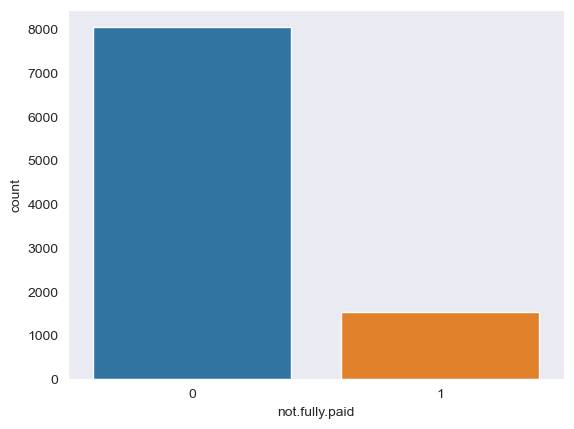

In [105]:
sns.set_style('dark')
pos = (loans["not.fully.paid"] == 1).sum()
neg = (loans["not.fully.paid"] == 0).sum()
print('Positive Value: ',pos)
print('Negative Value: ',neg)

sns.countplot(x = 'not.fully.paid', data = loans)

count of not fully paid loans is much more than fully paid

<Axes: xlabel='purpose', ylabel='count'>

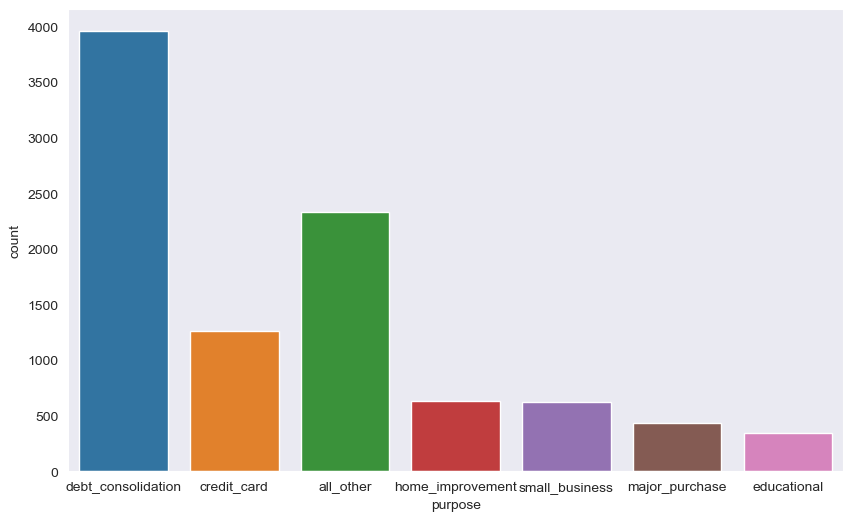

In [108]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x = 'purpose', data = loans)

most debts purpose is debt_consolidation

<Axes: xlabel='credit.policy', ylabel='count'>

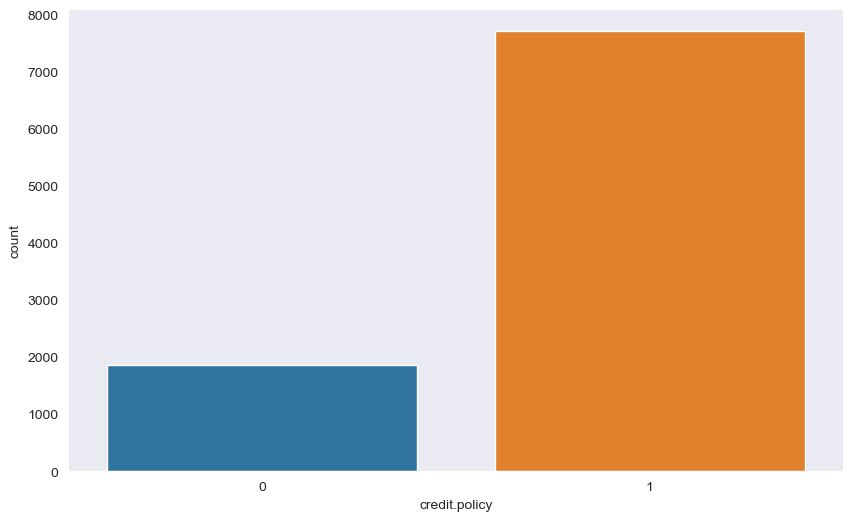

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x = 'credit.policy', data = loans)

Most of the customers meet the credit policy criteria

Text(0.5, 0, 'FICO')

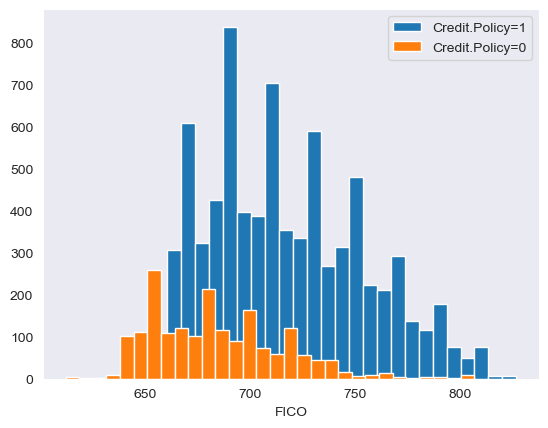

In [41]:
#Making Histogram to know the Fico rating of the persons who met or not met the credit underwriting criteria 
sns.set_style('dark')
plt.hist(loans['fico'].loc[loans['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(loans['fico'].loc[loans['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

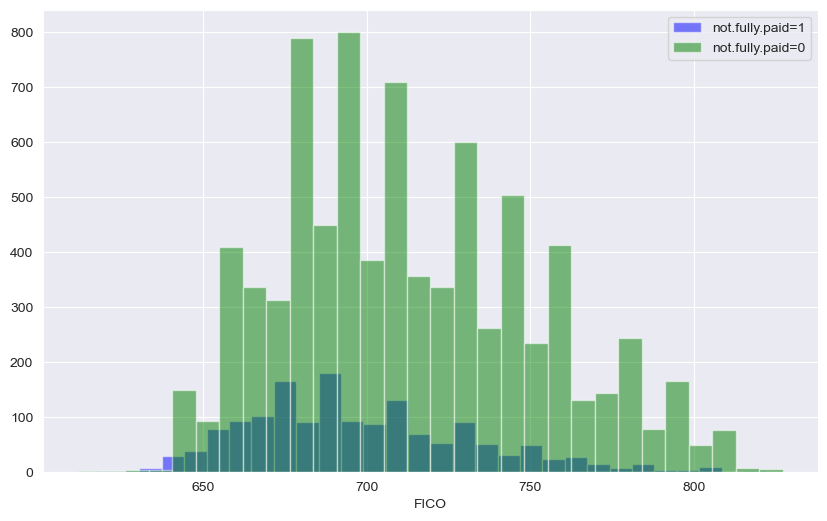

In [48]:
#Plotting a bar graph to see the fico rating of which customers did not fully paid loan
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

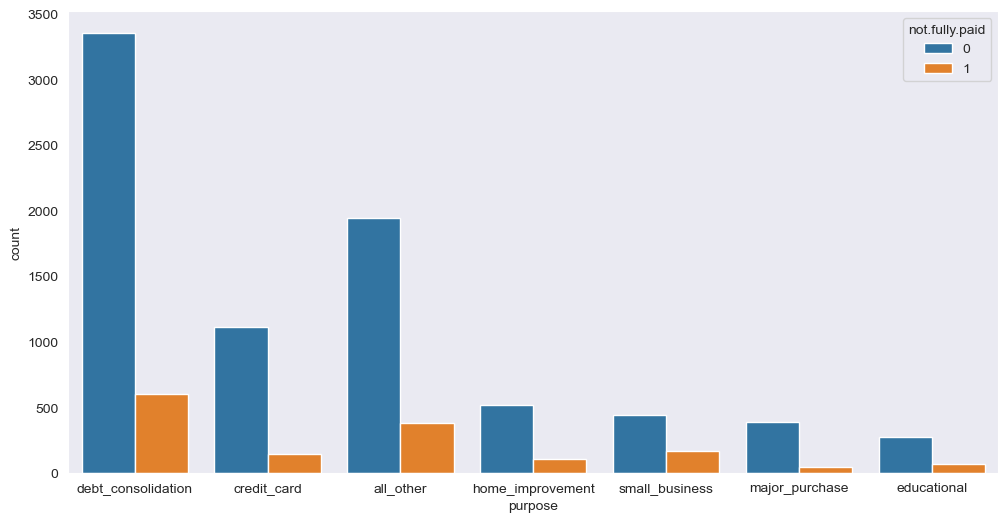

In [46]:
#creating a countplot to see the counts of purpose of loans by not.fully.paid
sns.set_style('dark')
plt.figure(figsize=(12,6))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid')

<Figure size 2000x600 with 0 Axes>

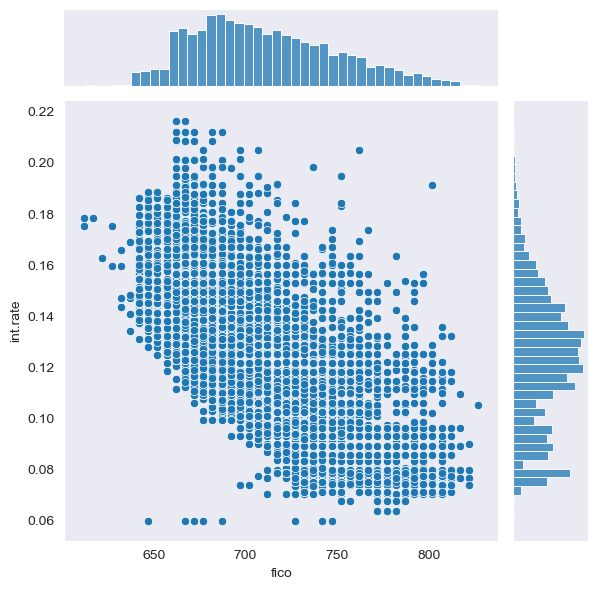

In [45]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(20,6))
sns.jointplot(x='fico', y='int.rate', data=loans)

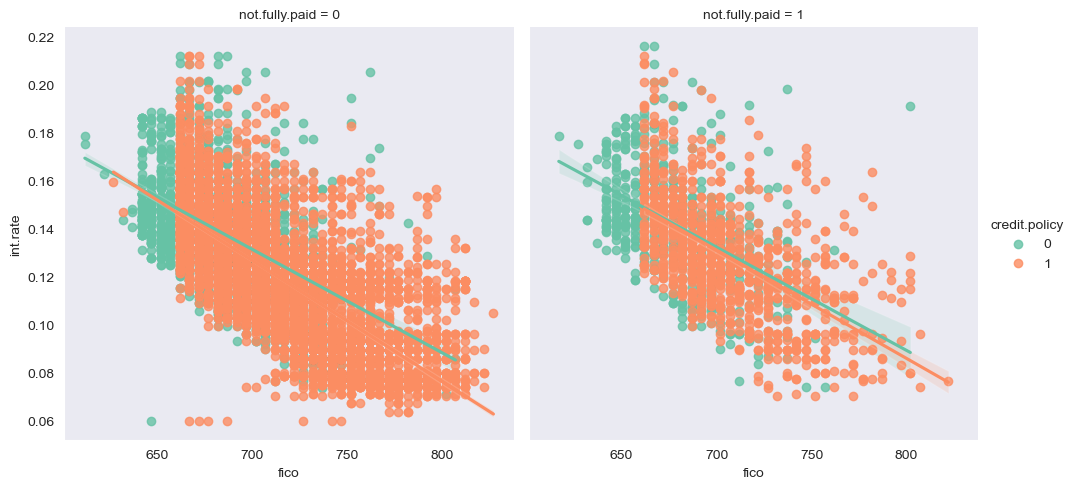

In [49]:
#understanding the relationship between credit.policy and not.fully.paid
sns.set_style('dark')
sns.lmplot(data=loans, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')

as we can see here the data is not normally distributed here and there in no relationship

In [78]:
#handling categorical variable purpose
purpose_c = pd.get_dummies(loans['purpose'], drop_first=True)
loans_1 = pd.concat([loans, purpose_c], axis=1).drop('purpose', axis=1)
loans_1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [79]:
#Converting purpose columns boolean values to integers
loans_1['credit_card'] = loans_f['credit_card'].astype(int)
loans_1['debt_consolidation'] = loans_f['debt_consolidation'].astype(int)
loans_1['educational'] = loans_f['educational'].astype(int)
loans_1['home_improvement'] = loans_f['home_improvement'].astype(int)
loans_1['major_purchase'] = loans_f['major_purchase'].astype(int)
loans_1['small_business'] = loans_f['small_business'].astype(int)
loans_1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Prediction, train/test models and decision tree

In [84]:
#splitting the data set
y = loans_1['not.fully.paid'] 
X = loans_1.drop('not.fully.paid', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[1307  281]
 [ 279   49]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1588
           1       0.15      0.15      0.15       328

    accuracy                           0.71      1916
   macro avg       0.49      0.49      0.49      1916
weighted avg       0.71      0.71      0.71      1916



We are getting accuary of 82% here which is not much good

In [85]:
#Using Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)

#Checking the performance of the tree decision model
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[1313  275]
 [ 249   79]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1588
           1       0.22      0.24      0.23       328

    accuracy                           0.73      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.73      0.73      0.73      1916



Here, we got a slighlty better accuracy score of 83% but it will not help much so we can assume that both models failed to predict the loan repayment